#### Lesson: LQ Control: Foundations

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from quantecon import LQ

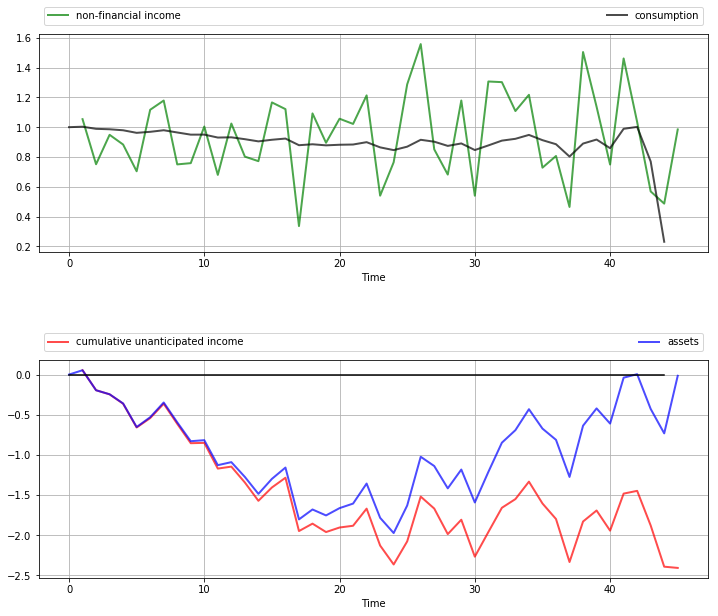

In [3]:
# Model parameters
r = 0.05
β = 1/(1 + r)
T = 45
c_bar = 2
σ = 0.25
μ = 1
q = 1e6

# Formulate as an LQ problem
Q = 1
R = np.zeros((2, 2))
Rf = np.zeros((2, 2))
Rf[0, 0] = q
A = [[1 + r, -c_bar + μ],
    [0,              1]]
B = [[-1],
    [ 0]]
C = [[σ],
    [0]]

# Compute solutions and simulate
lq = LQ(Q, R, A, B, C, beta=β, T=T, Rf=Rf)
x0 = (0, 1)
xp, up, wp = lq.compute_sequence(x0)

# Convert back to assets, consumption and income
assets = xp[0, :]           # a_t
c = up.flatten() + c_bar    # c_t
income = σ * wp[0, 1:] + μ  # y_t

# Plot results
n_rows = 2
fig, axes = plt.subplots(n_rows, 1, figsize=(12, 10))

plt.subplots_adjust(hspace=0.5)

bbox = (0., 1.02, 1., .102)
legend_args = {'bbox_to_anchor': bbox, 'loc': 3, 'mode': 'expand'}
p_args = {'lw': 2, 'alpha': 0.7}

axes[0].plot(list(range(1, T+1)), income, 'g-', label="non-financial income",
            **p_args)
axes[0].plot(list(range(T)), c, 'k-', label="consumption", **p_args)

axes[1].plot(list(range(1, T+1)), np.cumsum(income - μ), 'r-',
            label="cumulative unanticipated income", **p_args)
axes[1].plot(list(range(T+1)), assets, 'b-', label="assets", **p_args)
axes[1].plot(list(range(T)), np.zeros(T), 'k-')

for ax in axes:
    ax.grid()
    ax.set_xlabel('Time')
    ax.legend(ncol=2, **legend_args)

plt.show()

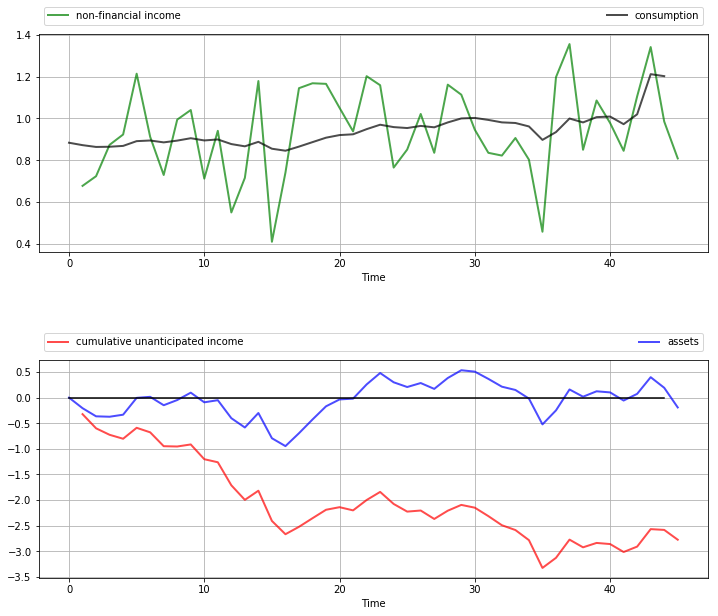

In [4]:
# Compute solutions and simulate
lq = LQ(Q, R, A, B, C, beta=0.96, T=T, Rf=Rf)
x0 = (0, 1)
xp, up, wp = lq.compute_sequence(x0)

# Convert back to assets, consumption and income
assets = xp[0, :]           # a_t
c = up.flatten() + c_bar    # c_t
income = σ * wp[0, 1:] + μ  # y_t

# Plot results
n_rows = 2
fig, axes = plt.subplots(n_rows, 1, figsize=(12, 10))

plt.subplots_adjust(hspace=0.5)

bbox = (0., 1.02, 1., .102)
legend_args = {'bbox_to_anchor': bbox, 'loc': 3, 'mode': 'expand'}
p_args = {'lw': 2, 'alpha': 0.7}

axes[0].plot(list(range(1, T+1)), income, 'g-', label="non-financial income",
             **p_args)
axes[0].plot(list(range(T)), c, 'k-', label="consumption", **p_args)

axes[1].plot(list(range(1, T+1)), np.cumsum(income - μ), 'r-',
             label="cumulative unanticipated income", **p_args)
axes[1].plot(list(range(T+1)), assets, 'b-', label="assets", **p_args)
axes[1].plot(list(range(T)), np.zeros(T), 'k-')

for ax in axes:
    ax.grid()
    ax.set_xlabel('Time')
    ax.legend(ncol=2, **legend_args)

plt.show()

Exercise 1

![Ex1](img/lqcontrol_1.png)

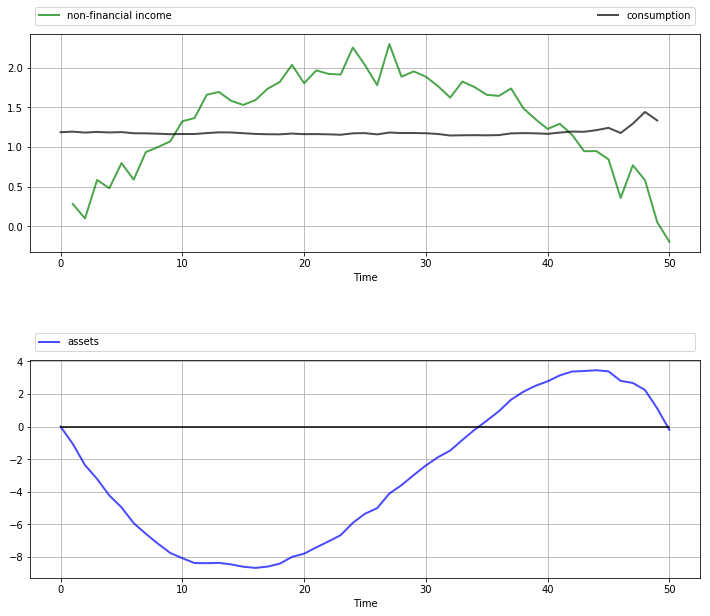

In [5]:
# Model parameters
r = 0.05
β = 1/(1 + r)
T = 50
c_bar = 1.5
σ = 0.15
μ = 2
q = 1e4
m1 = T * (μ/(T/2)**2)
m2 = -(μ/(T/2)**2)

# Formulate as an LQ problem
Q = 1
R = np.zeros((4, 4))
Rf = np.zeros((4, 4))
Rf[0, 0] = q
A = [[1 + r, -c_bar, m1, m2],
     [0,          1,  0,  0],
     [0,          1,  1,  0],
     [0,          1,  2,  1]]
B = [[-1],
     [ 0],
     [ 0],
     [ 0]]
C = [[σ],
     [0],
     [0],
     [0]]

# Compute solutions and simulate
lq = LQ(Q, R, A, B, C, beta=β, T=T, Rf=Rf)
x0 = (0, 1, 0, 0)
xp, up, wp = lq.compute_sequence(x0)

# Convert results back to assets, consumption and income
ap = xp[0, :]               # Assets
c = up.flatten() + c_bar    # Consumption
time = np.arange(1, T+1)
income = σ * wp[0, 1:] + m1 * time + m2 * time**2  # Income


# Plot results
n_rows = 2
fig, axes = plt.subplots(n_rows, 1, figsize=(12, 10))

plt.subplots_adjust(hspace=0.5)

bbox = (0., 1.02, 1., .102)
legend_args = {'bbox_to_anchor': bbox, 'loc': 3, 'mode': 'expand'}
p_args = {'lw': 2, 'alpha': 0.7}

axes[0].plot(range(1, T+1), income, 'g-', label="non-financial income",
            **p_args)
axes[0].plot(range(T), c, 'k-', label="consumption", **p_args)

axes[1].plot(range(T+1), ap.flatten(), 'b-', label="assets", **p_args)
axes[1].plot(range(T+1), np.zeros(T+1), 'k-')

for ax in axes:
    ax.grid()
    ax.set_xlabel('Time')
    ax.legend(ncol=2, **legend_args)

plt.show()

Exercise 2

![Ex2](img/lqcontrol_2.png)

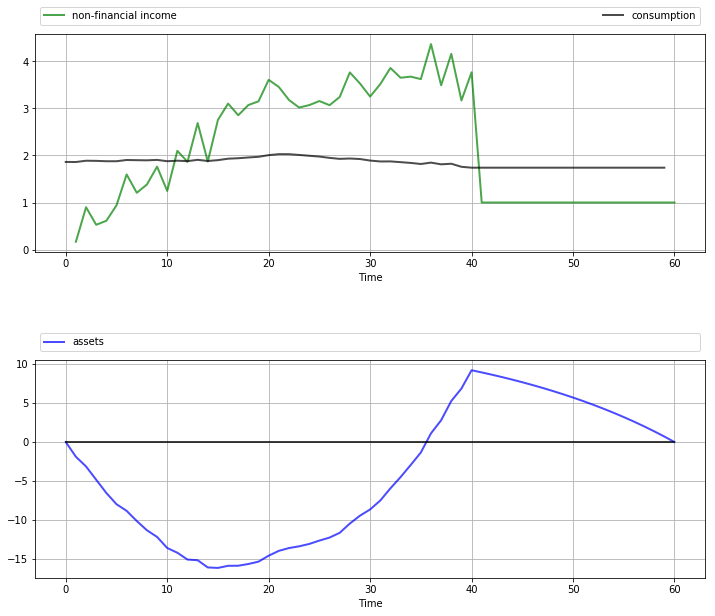

In [6]:
# Model parameters
r = 0.05
β = 1/(1 + r)
T = 60
K = 40
c_bar = 4
σ = 0.35
μ = 4
q = 1e4
s = 1
m1 = 2 * μ/K
m2 = -μ/K**2

# Formulate LQ problem 1 (retirement)
Q = 1
R = np.zeros((4, 4))
Rf = np.zeros((4, 4))
Rf[0, 0] = q
A = [[1 + r, s - c_bar, 0, 0],
     [0,             1, 0, 0],
     [0,             1, 1, 0],
     [0,             1, 2, 1]]
B = [[-1],
     [ 0],
     [ 0],
     [ 0]]
C = [[0],
     [0],
     [0],
     [0]]

# Initialize LQ instance for retired agent
lq_retired = LQ(Q, R, A, B, C, beta=β, T=T-K, Rf=Rf)
# Iterate back to start of retirement, record final value function
for i in range(T-K):
    lq_retired.update_values()
Rf2 = lq_retired.P

# Formulate LQ problem 2 (working life)
R = np.zeros((4, 4))
A = [[1 + r, -c_bar, m1, m2],
     [0,          1,  0,  0],
     [0,          1,  1,  0],
     [0,          1,  2,  1]]
B = [[-1],
     [ 0],
     [ 0],
     [ 0]]
C = [[σ],
     [0],
     [0],
     [0]]

# Set up working life LQ instance with terminal Rf from lq_retired
lq_working = LQ(Q, R, A, B, C, beta=β, T=K, Rf=Rf2)

# Simulate working state / control paths
x0 = (0, 1, 0, 0)
xp_w, up_w, wp_w = lq_working.compute_sequence(x0)
# Simulate retirement paths (note the initial condition)
xp_r, up_r, wp_r = lq_retired.compute_sequence(xp_w[:, K])

# Convert results back to assets, consumption and income
xp = np.column_stack((xp_w, xp_r[:, 1:]))
assets = xp[0, :]                  # Assets

up = np.column_stack((up_w, up_r))
c = up.flatten() + c_bar           # Consumption

time = np.arange(1, K+1)
income_w = σ * wp_w[0, 1:K+1] + m1 * time + m2 * time**2  # Income
income_r = np.ones(T-K) * s
income = np.concatenate((income_w, income_r))

# Plot results
n_rows = 2
fig, axes = plt.subplots(n_rows, 1, figsize=(12, 10))

plt.subplots_adjust(hspace=0.5)

bbox = (0., 1.02, 1., .102)
legend_args = {'bbox_to_anchor': bbox, 'loc': 3, 'mode': 'expand'}
p_args = {'lw': 2, 'alpha': 0.7}

axes[0].plot(range(1, T+1), income, 'g-', label="non-financial income",
            **p_args)
axes[0].plot(range(T), c, 'k-', label="consumption", **p_args)

axes[1].plot(range(T+1), assets, 'b-', label="assets", **p_args)
axes[1].plot(range(T+1), np.zeros(T+1), 'k-')

for ax in axes:
    ax.grid()
    ax.set_xlabel('Time')
    ax.legend(ncol=2, **legend_args)

plt.show()

Exercise 3

![Ex3](img/lqcontrol_3.png)

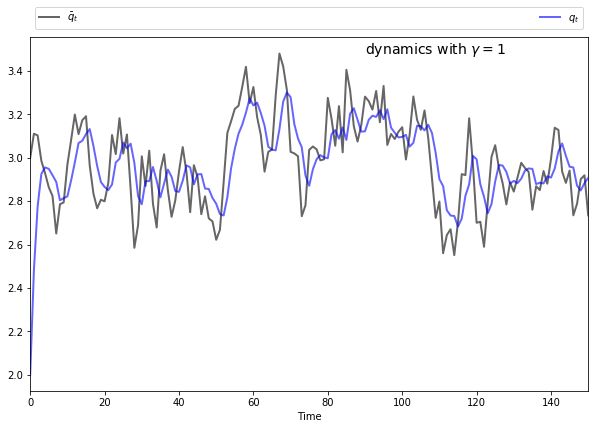

In [7]:
# Model parameters
a0 = 5
a1 = 0.5
σ = 0.15
ρ = 0.9
γ = 1
β = 0.95
c = 2
T = 120

# Useful constants
m0 = (a0-c)/(2 * a1)
m1 = 1/(2 * a1)

# Formulate LQ problem
Q = γ
R = [[ a1, -a1,  0],
     [-a1,  a1,  0],
     [  0,   0,  0]]
A = [[ρ, 0, m0 * (1 - ρ)],
     [0, 1,            0],
     [0, 0,            1]]

B = [[0],
     [1],
     [0]]
C = [[m1 * σ],
     [     0],
     [     0]]

lq = LQ(Q, R, A, B, C=C, beta=β)

# Simulate state / control paths
x0 = (m0, 2, 1)
xp, up, wp = lq.compute_sequence(x0, ts_length=150)
q_bar = xp[0, :]
q = xp[1, :]

# Plot simulation results
fig, ax = plt.subplots(figsize=(10, 6.5))

# Some fancy plotting stuff -- simplify if you prefer
bbox = (0., 1.01, 1., .101)
legend_args = {'bbox_to_anchor': bbox, 'loc': 3, 'mode': 'expand'}
p_args = {'lw': 2, 'alpha': 0.6}

time = range(len(q))
ax.set(xlabel='Time', xlim=(0, max(time)))
ax.plot(time, q_bar, 'k-', lw=2, alpha=0.6, label=r'$\bar q_t$')
ax.plot(time, q, 'b-', lw=2, alpha=0.6, label='$q_t$')
ax.legend(ncol=2, **legend_args)
s = f'dynamics with $\gamma = {γ}$'
ax.text(max(time) * 0.6, 1 * q_bar.max(), s, fontsize=14)
plt.show()

#### Lesson: Optimal Savings I: The Permanent Income Model

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import random
from numba import njit

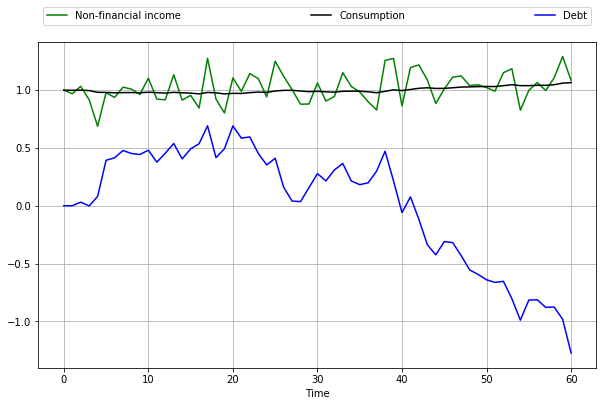

In [9]:
r = 0.05
β = 1 / (1 + r)
σ = 0.15
μ = 1
T = 60

@njit
def time_path(T):
    w = np.random.randn(T+1)  # w_0, w_1, ..., w_T
    w[0] = 0
    b = np.zeros(T+1)
    for t in range(1, T+1):
        b[t] = w[1:t].sum()
    b = -σ * b
    c = μ + (1 - β) * (σ * w - b)
    return w, b, c

w, b, c = time_path(T)

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(μ + σ * w, 'g-', label="Non-financial income")
ax.plot(c, 'k-', label="Consumption")
ax.plot( b, 'b-', label="Debt")
ax.legend(ncol=3, mode='expand', bbox_to_anchor=(0., 1.02, 1., .102))
ax.grid()
ax.set_xlabel('Time')

plt.show()

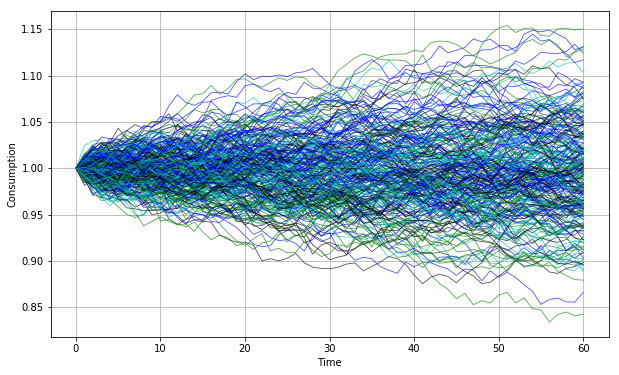

In [10]:
fig, ax = plt.subplots(figsize=(10, 6))

b_sum = np.zeros(T+1)
for i in range(250):
    w, b, c = time_path(T)  # Generate new time path
    rcolor = random.choice(('c', 'g', 'b', 'k'))
    ax.plot(c, color=rcolor, lw=0.8, alpha=0.7)

ax.grid()
ax.set(xlabel='Time', ylabel='Consumption')

plt.show()

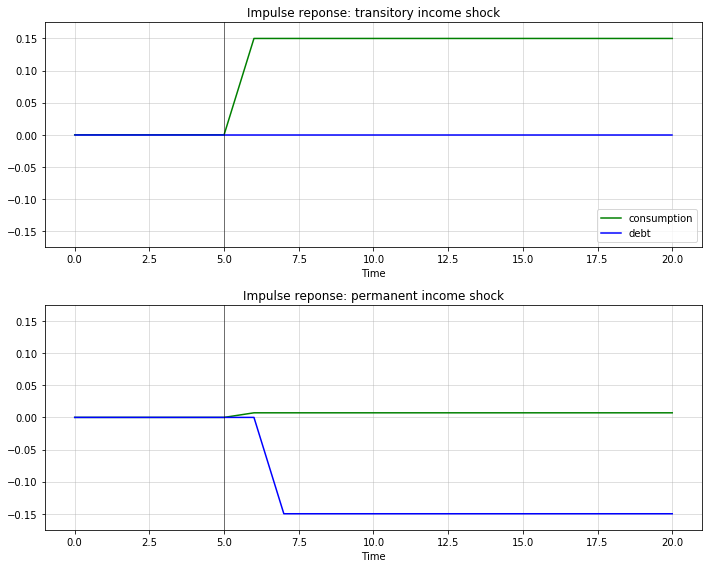

In [11]:
r = 0.05
β = 1 / (1 + r)
S = 5   # Impulse date
σ1 = σ2 = 0.15

@njit
def time_path(T, permanent=False):
    "Time path of consumption and debt given shock sequence"
    w1 = np.zeros(T+1)
    w2 = np.zeros(T+1)
    b = np.zeros(T+1)
    c = np.zeros(T+1)
    if permanent:
        w1[S+1] = 1.0
    else:
        w2[S+1] = 1.0
    for t in range(1, T):
        b[t+1] = b[t] - σ2 * w2[t]
        c[t+1] = c[t] + σ1 * w1[t+1] + (1 - β) * σ2 * w2[t+1]
    return b, c


fig, axes = plt.subplots(2, 1, figsize=(10, 8))
titles = ['transitory', 'permanent']

L = 0.175

for ax, truefalse, title in zip(axes, (True, False), titles):
    b, c = time_path(T=20, permanent=truefalse)
    ax.set_title(f'Impulse reponse: {title} income shock')
    ax.plot(c, 'g-', label="consumption")
    ax.plot(b, 'b-', label="debt")
    ax.plot((S, S), (-L, L), 'k-', lw=0.5)
    ax.grid(alpha=0.5)
    ax.set(xlabel=r'Time', ylim=(-L, L))

axes[0].legend(loc='lower right')

plt.tight_layout()
plt.show()



#### Lesson: Optimal Savings II: LQ Techniques

In [1]:
import quantecon as qe
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Set parameters
α, β, ρ1, ρ2, σ = 10.0, 0.95, 0.9, 0.0, 1.0

R = 1 / β
A = np.array([[1., 0., 0.],
              [α,  ρ1, ρ2],
              [0., 1., 0.]])
C = np.array([[0.], [σ], [0.]])
G = np.array([[0., 1., 0.]])

# Form LinearStateSpace system and pull off steady state moments
μ_z0 = np.array([[1.0], [0.0], [0.0]])
Σ_z0 = np.zeros((3, 3))
Lz = qe.LinearStateSpace(A, C, G, mu_0=μ_z0, Sigma_0=Σ_z0)
μ_z, μ_y, Σ_z, Σ_y = Lz.stationary_distributions()

# Mean vector of state for the savings problem
mxo = np.vstack([μ_z, 0.0])

# Create stationary covariance matrix of x -- start everyone off at b=0
a1 = np.zeros((3, 1))
aa = np.hstack([Σ_z, a1])
bb = np.zeros((1, 4))
sxo = np.vstack([aa, bb])

# These choices will initialize the state vector of an individual at zero
# debt and the ergodic distribution of the endowment process. Use these to
# create the Bewley economy.
mxbewley = mxo
sxbewley = sxo

In [3]:
A12 = np.zeros((3,1))
ALQ_l = np.hstack([A, A12])
ALQ_r = np.array([[0, -R, 0, R]])
ALQ = np.vstack([ALQ_l, ALQ_r])

RLQ = np.array([[0., 0., 0., 0.],
                [0., 0., 0., 0.],
                [0., 0., 0., 0.],
                [0., 0., 0., 1e-9]])

QLQ = np.array([1.0])
BLQ = np.array([0., 0., 0., R]).reshape(4,1)
CLQ = np.array([0., σ, 0., 0.]).reshape(4,1)
β_LQ = β

In [4]:
print(f"A = \n {ALQ}")
print(f"B = \n {BLQ}")
print(f"R = \n {RLQ}")
print(f"Q = \n {QLQ}")

A = 
 [[ 1.          0.          0.          0.        ]
 [10.          0.9         0.          0.        ]
 [ 0.          1.          0.          0.        ]
 [ 0.         -1.05263158  0.          1.05263158]]
B = 
 [[0.        ]
 [0.        ]
 [0.        ]
 [1.05263158]]
R = 
 [[0.e+00 0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00 1.e-09]]
Q = 
 [1.]


In [5]:
lqpi = qe.LQ(QLQ, RLQ, ALQ, BLQ, C=CLQ, beta=β_LQ)

In [6]:
P, F, d = lqpi.stationary_values()  # Compute value function and decision rule
ABF = ALQ - BLQ @ F  #  Form closed loop system

In [7]:
# Use the above formulas to create the optimal policies for b_{t+1} and c_t
b_pol = G @ la.inv(np.eye(3, 3) - β * A) @ (A - np.eye(3, 3))
c_pol = (1 - β) * G @ la.inv(np.eye(3, 3) - β * A)

# Create the A matrix for a LinearStateSpace instance
A_LSS1 = np.vstack([A, b_pol])
A_LSS2 = np.eye(4, 1, -3)
A_LSS = np.hstack([A_LSS1, A_LSS2])

# Create the C matrix for LSS methods
C_LSS = np.vstack([C, np.zeros(1)])

# Create the G matrix for LSS methods
G_LSS1 = np.vstack([G, c_pol])
G_LSS2 = np.vstack([np.zeros(1), -(1 - β)])
G_LSS = np.hstack([G_LSS1, G_LSS2])

# Use the following values to start everyone off at b=0, initial incomes zero
μ_0 = np.array([1., 0., 0., 0.])
Σ_0 = np.zeros((4, 4))

In [8]:
ABF - A_LSS

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [-9.51248175e-06,  9.51247915e-08,  3.36117263e-17,
        -1.99999923e-08]])

In [9]:
print(c_pol, "\n", -F)

[[6.55172414e+01 3.44827586e-01 1.68058632e-18]] 
 [[ 6.55172323e+01  3.44827677e-01 -0.00000000e+00 -5.00000190e-02]]


In [10]:
lss = qe.LinearStateSpace(A_LSS, C_LSS, G_LSS, mu_0=μ_0, Sigma_0=Σ_0)

In [11]:
def income_consumption_debt_series(A, C, G, μ_0, Σ_0, T=150, npaths=25):
    """
    This function takes initial conditions (μ_0, Σ_0) and uses the
    LinearStateSpace class from QuantEcon to  simulate an economy
    npaths times for T periods. It then uses that information to
    generate some graphs related to the discussion below.
    """
    lss = qe.LinearStateSpace(A, C, G, mu_0=μ_0, Sigma_0=Σ_0)

    # Simulation/Moment Parameters
    moment_generator = lss.moment_sequence()

    # Simulate various paths
    bsim = np.empty((npaths, T))
    csim = np.empty((npaths, T))
    ysim = np.empty((npaths, T))

    for i in range(npaths):
        sims = lss.simulate(T)
        bsim[i, :] = sims[0][-1, :]
        csim[i, :] = sims[1][1, :]
        ysim[i, :] = sims[1][0, :]

    # Get the moments
    cons_mean = np.empty(T)
    cons_var = np.empty(T)
    debt_mean = np.empty(T)
    debt_var = np.empty(T)
    for t in range(T):
        μ_x, μ_y, Σ_x, Σ_y = next(moment_generator)
        cons_mean[t], cons_var[t] = μ_y[1], Σ_y[1, 1]
        debt_mean[t], debt_var[t] = μ_x[3], Σ_x[3, 3]

    return bsim, csim, ysim, cons_mean, cons_var, debt_mean, debt_var

def consumption_income_debt_figure(bsim, csim, ysim):

    # Get T
    T =  bsim.shape[1]

    # Create the first figure
    fig, ax = plt.subplots(2, 1, figsize=(10, 8))
    xvals = np.arange(T)

    # Plot consumption and income
    ax[0].plot(csim[0, :], label="c", color="b")
    ax[0].plot(ysim[0, :], label="y", color="g")
    ax[0].plot(csim.T, alpha=.1, color="b")
    ax[0].plot(ysim.T, alpha=.1, color="g")
    ax[0].legend(loc=4)
    ax[0].set(title="Nonfinancial Income, Consumption, and Debt",
              xlabel="t", ylabel="y and c")

    # Plot debt
    ax[1].plot(bsim[0, :], label="b", color="r")
    ax[1].plot(bsim.T, alpha=.1, color="r")
    ax[1].legend(loc=4)
    ax[1].set(xlabel="t", ylabel="debt")

    fig.tight_layout()
    return fig

def consumption_debt_fanchart(csim, cons_mean, cons_var,
                              bsim, debt_mean, debt_var):
    # Get T
    T =  bsim.shape[1]

    # Create percentiles of cross-section distributions
    cmean = np.mean(cons_mean)
    c90 = 1.65 * np.sqrt(cons_var)
    c95 = 1.96 * np.sqrt(cons_var)
    c_perc_95p, c_perc_95m = cons_mean + c95, cons_mean - c95
    c_perc_90p, c_perc_90m = cons_mean + c90, cons_mean - c90

    # Create percentiles of cross-section distributions
    dmean = np.mean(debt_mean)
    d90 = 1.65 * np.sqrt(debt_var)
    d95 = 1.96 * np.sqrt(debt_var)
    d_perc_95p, d_perc_95m = debt_mean + d95, debt_mean - d95
    d_perc_90p, d_perc_90m = debt_mean + d90, debt_mean - d90


    # Create second figure
    fig, ax = plt.subplots(2, 1, figsize=(10, 8))
    xvals = np.arange(T)

    # Consumption fan
    ax[0].plot(xvals, cons_mean, color="k")
    ax[0].plot(csim.T, color="k", alpha=.25)
    ax[0].fill_between(xvals, c_perc_95m, c_perc_95p, alpha=.25, color="b")
    ax[0].fill_between(xvals, c_perc_90m, c_perc_90p, alpha=.25, color="r")
    ax[0].set(title="Consumption/Debt over time",
              ylim=(cmean-15, cmean+15), ylabel="consumption")

    # Debt fan
    ax[1].plot(xvals, debt_mean, color="k")
    ax[1].plot(bsim.T, color="k", alpha=.25)
    ax[1].fill_between(xvals, d_perc_95m, d_perc_95p, alpha=.25, color="b")
    ax[1].fill_between(xvals, d_perc_90m, d_perc_90p, alpha=.25, color="r")
    ax[1].set(xlabel="t", ylabel="debt")

    fig.tight_layout()
    return fig

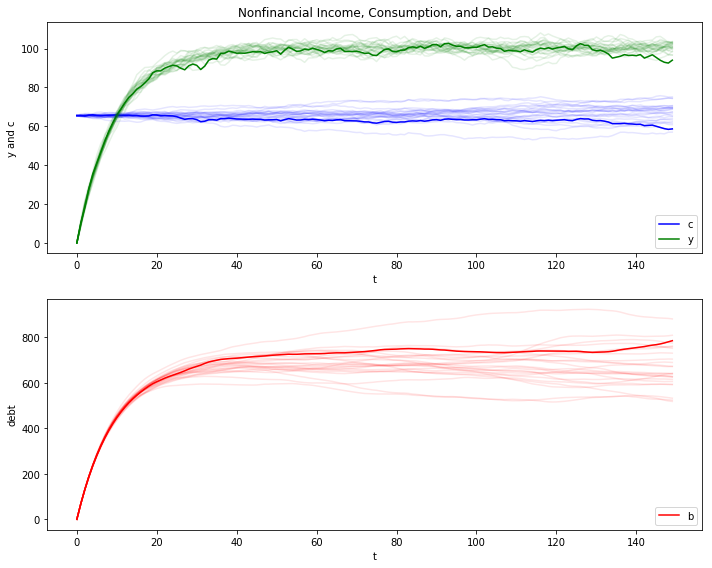

In [12]:
out = income_consumption_debt_series(A_LSS, C_LSS, G_LSS, μ_0, Σ_0)
bsim0, csim0, ysim0 = out[:3]
cons_mean0, cons_var0, debt_mean0, debt_var0 = out[3:]

consumption_income_debt_figure(bsim0, csim0, ysim0)

plt.show()

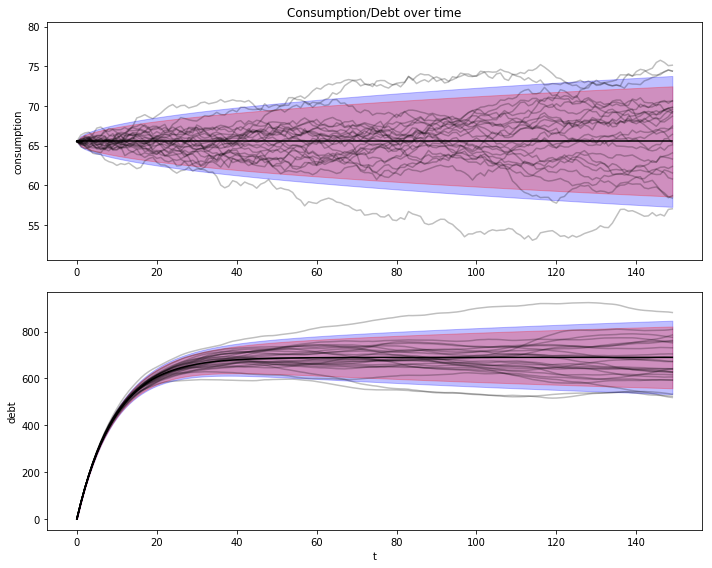

In [13]:
consumption_debt_fanchart(csim0, cons_mean0, cons_var0,
                          bsim0, debt_mean0, debt_var0)

plt.show()

In [14]:
def cointegration_figure(bsim, csim):
    """
    Plots the cointegration
    """
    # Create figure
    fig, ax = plt.subplots(figsize=(10, 8))
    ax.plot((1 - β) * bsim[0, :] + csim[0, :], color="k")
    ax.plot((1 - β) * bsim.T + csim.T, color="k", alpha=.1)

    ax.set(title="Cointegration of Assets and Consumption", xlabel="t")

    return fig

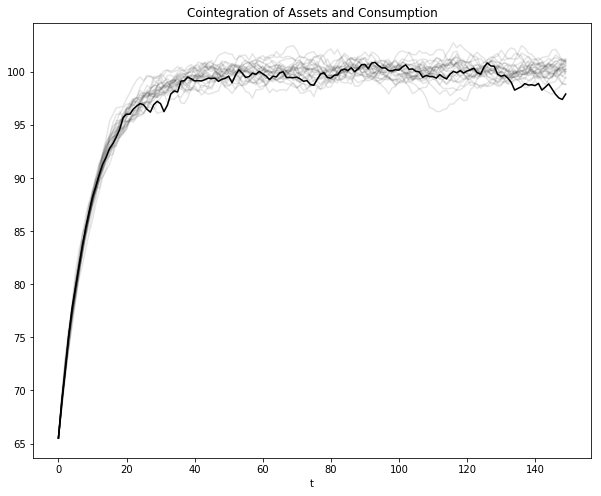

In [15]:
cointegration_figure(bsim0, csim0)
plt.show()

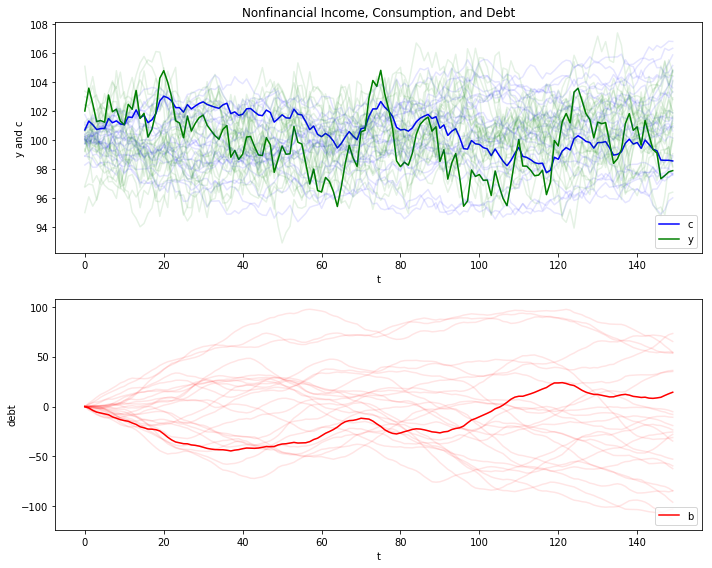

In [16]:
out = income_consumption_debt_series(A_LSS, C_LSS, G_LSS, mxbewley, sxbewley)
bsimb, csimb, ysimb = out[:3]
cons_meanb, cons_varb, debt_meanb, debt_varb = out[3:]

consumption_income_debt_figure(bsimb, csimb, ysimb)

plt.show()

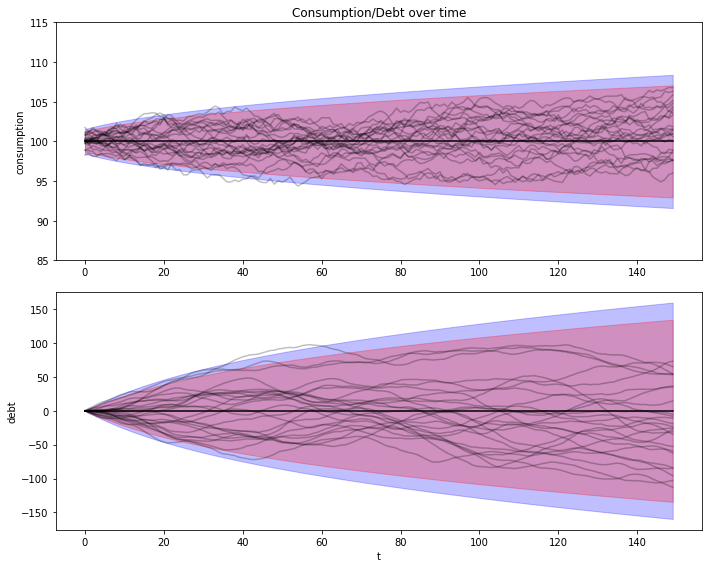

In [17]:
consumption_debt_fanchart(csimb, cons_meanb, cons_varb,
                          bsimb, debt_meanb, debt_varb)

plt.show()

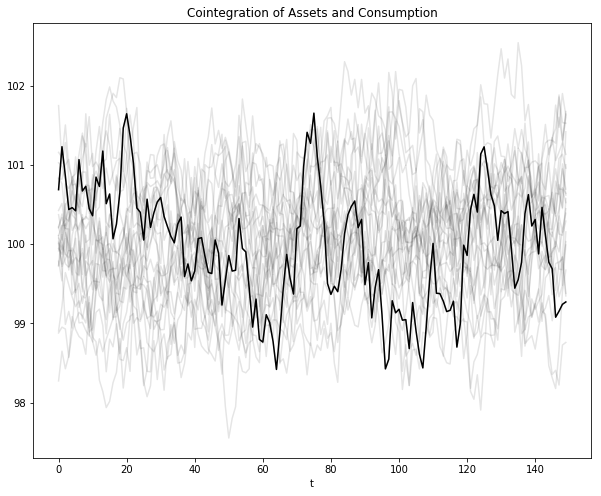

In [18]:
cointegration_figure(bsimb, csimb)
plt.show()

#### Lesson: Consumption Smoothing with Complete and Incomplete Markets

In [1]:
import numpy as np
import quantecon as qe
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.linalg as la

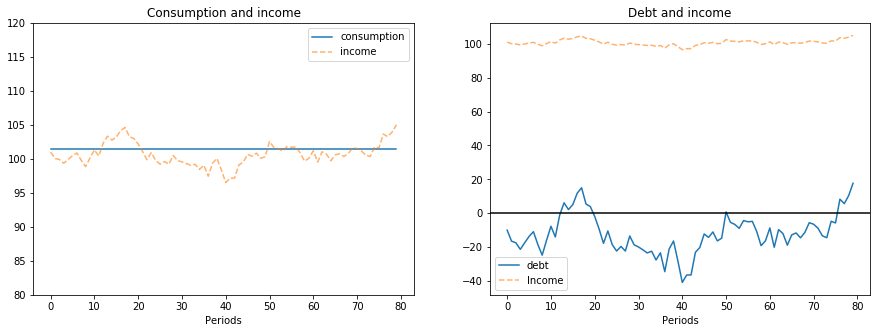

In [2]:
def complete_ss(β, b0, x0, A, C, S_y, T=12):
    """
    Computes the path of consumption and debt for the previously described
    complete markets model where exogenous income follows a linear
    state space
    """
    # Create a linear state space for simulation purposes
    # This adds "b" as a state to the linear state space system
    # so that setting the seed places shocks in same place for
    # both the complete and incomplete markets economy
    # Atilde = np.vstack([np.hstack([A, np.zeros((A.shape[0], 1))]),
    #                   np.zeros((1, A.shape[1] + 1))])
    # Ctilde = np.vstack([C, np.zeros((1, 1))])
    # S_ytilde = np.hstack([S_y, np.zeros((1, 1))])

    lss = qe.LinearStateSpace(A, C, S_y, mu_0=x0)

    # Add extra state to initial condition
    # x0 = np.hstack([x0, np.zeros(1)])

    # Compute the (I - β * A)^{-1}
    rm = la.inv(np.eye(A.shape[0]) - β * A)

    # Constant level of consumption
    cbar = (1 - β) * (S_y @ rm @ x0 - b0)
    c_hist = np.ones(T) * cbar

    # Debt
    x_hist, y_hist = lss.simulate(T)
    b_hist = np.squeeze(S_y @ rm @ x_hist - cbar / (1 - β))


    return c_hist, b_hist, np.squeeze(y_hist), x_hist


# Define parameters
N_simul = 80
α, ρ1, ρ2 = 10.0, 0.9, 0.0
σ = 1.0

A = np.array([[1., 0., 0.],
            [α,  ρ1, ρ2],
            [0., 1., 0.]])
C = np.array([[0.], [σ], [0.]])
S_y = np.array([[1,  1.0, 0.]])
β, b0 = 0.95, -10.0
x0 = np.array([1.0, α / (1 - ρ1), α / (1 - ρ1)])

# Do simulation for complete markets
s = np.random.randint(0, 10000)
np.random.seed(s)  # Seeds get set the same for both economies
out = complete_ss(β, b0, x0, A, C, S_y, 80)
c_hist_com, b_hist_com, y_hist_com, x_hist_com = out

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Consumption plots
ax[0].set_title('Consumption and income')
ax[0].plot(np.arange(N_simul), c_hist_com, label='consumption')
ax[0].plot(np.arange(N_simul), y_hist_com, label='income', alpha=.6, linestyle='--')
ax[0].legend()
ax[0].set_xlabel('Periods')
ax[0].set_ylim([80, 120])

# Debt plots
ax[1].set_title('Debt and income')
ax[1].plot(np.arange(N_simul), b_hist_com, label='debt')
ax[1].plot(np.arange(N_simul), y_hist_com, label='Income', alpha=.6, linestyle='--')
ax[1].legend()
ax[1].axhline(0, color='k')
ax[1].set_xlabel('Periods')

plt.show()

In [3]:
class ConsumptionProblem:
    """
    The data for a consumption problem, including some default values.
    """

    def __init__(self,
                 β=.96,
                 y=[2, 1.5],
                 b0=3,
                 P=[[.8, .2],
                    [.4, .6]],
                 init=0):
        """
        Parameters
        ----------

        β : discount factor
        y : list containing the two income levels
        b0 : debt in period 0 (= initial state debt level)
        P : 2x2 transition matrix
        init : index of initial state s0
        """
        self.β = β
        self.y = np.asarray(y)
        self.b0 = b0
        self.P = np.asarray(P)
        self.init = init

    def simulate(self, N_simul=80, random_state=1):
        """
        Parameters
        ----------

        N_simul : number of periods for simulation
        random_state : random state for simulating Markov chain
        """
        # For the simulation define a quantecon MC class
        mc = qe.MarkovChain(self.P)
        s_path = mc.simulate(N_simul, init=self.init, random_state=random_state)

        return s_path


def consumption_complete(cp):
    """
    Computes endogenous values for the complete market case.

    Parameters
    ----------

    cp : instance of ConsumptionProblem

    Returns
    -------

        c_bar : constant consumption
        b : optimal debt in each state

    associated with the price system

        Q = β * P
    """
    β, P, y, b0, init = cp.β, cp.P, cp.y, cp.b0, cp.init   # Unpack

    Q = β * P                               # assumed price system

    # construct matrices of augmented equation system
    n = P.shape[0] + 1

    y_aug = np.empty((n, 1))
    y_aug[0, 0] = y[init] - b0
    y_aug[1:, 0] = y

    Q_aug = np.zeros((n, n))
    Q_aug[0, 1:] = Q[init, :]
    Q_aug[1:, 1:] = Q

    A = np.zeros((n, n))
    A[:, 0] = 1
    A[1:, 1:] = np.eye(n-1)

    x = np.linalg.inv(A - Q_aug) @ y_aug

    c_bar = x[0, 0]
    b = x[1:, 0]

    return c_bar, b


def consumption_incomplete(cp, s_path):
    """
    Computes endogenous values for the incomplete market case.

    Parameters
    ----------

    cp : instance of ConsumptionProblem
    s_path : the path of states
    """
    β, P, y, b0 = cp.β, cp.P, cp.y, cp.b0  # Unpack

    N_simul = len(s_path)

    # Useful variables
    n = len(y)
    y.shape = (n, 1)
    v = np.linalg.inv(np.eye(n) - β * P) @ y

    # Store consumption and debt path
    b_path, c_path = np.ones(N_simul+1), np.ones(N_simul)
    b_path[0] = b0

    # Optimal decisions from (12) and (13)
    db = ((1 - β) * v - y) / β

    for i, s in enumerate(s_path):
        c_path[i] = (1 - β) * (v - b_path[i] * np.ones((n, 1)))[s, 0]
        b_path[i + 1] = b_path[i] + db[s, 0]

    return c_path, b_path[:-1], y[s_path]

In [4]:
cp = ConsumptionProblem()
c_bar, b = consumption_complete(cp)
np.isclose(c_bar + b[1] - cp.y[1] - (cp.β * cp.P)[1, :] @ b, 0)

True

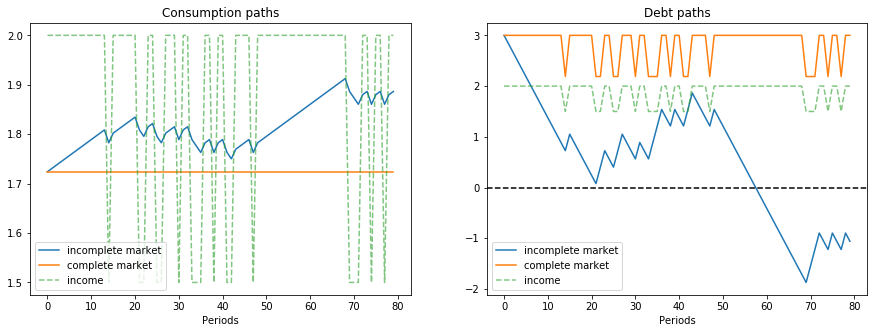

In [5]:
cp = ConsumptionProblem()
s_path = cp.simulate()
N_simul = len(s_path)

c_bar, debt_complete = consumption_complete(cp)

c_path, debt_path, y_path = consumption_incomplete(cp, s_path)

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].set_title('Consumption paths')
ax[0].plot(np.arange(N_simul), c_path, label='incomplete market')
ax[0].plot(np.arange(N_simul), c_bar * np.ones(N_simul),
                    label='complete market')
ax[0].plot(np.arange(N_simul), y_path, label='income', alpha=.6, ls='--')
ax[0].legend()
ax[0].set_xlabel('Periods')

ax[1].set_title('Debt paths')
ax[1].plot(np.arange(N_simul), debt_path, label='incomplete market')
ax[1].plot(np.arange(N_simul), debt_complete[s_path],
           label='complete market')
ax[1].plot(np.arange(N_simul), y_path, label='income', alpha=.6, ls='--')
ax[1].legend()
ax[1].axhline(0, color='k', ls='--')
ax[1].set_xlabel('Periods')

plt.show(

#### Lesson: Tax Smoothing with Complete and Incomplete Markets

In [1]:
import numpy as np
import quantecon as qe
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.linalg as la

In [2]:
class ConsumptionProblem:
    """
    The data for a consumption problem, including some default values.
    """

    def __init__(self,
                 β=.96,
                 y=[2, 1.5],
                 b0=3,
                 P=[[.8, .2],
                    [.4, .6]],
                 init=0):
        """
        Parameters
        ----------

        β : discount factor
        y : list containing the two income levels
        b0 : debt in period 0 (= initial state debt level)
        P : 2x2 transition matrix
        init : index of initial state s0
        """
        self.β = β
        self.y = np.asarray(y)
        self.b0 = b0
        self.P = np.asarray(P)
        self.init = init

    def simulate(self, N_simul=80, random_state=1):
        """
        Parameters
        ----------

        N_simul : number of periods for simulation
        random_state : random state for simulating Markov chain
        """
        # For the simulation define a quantecon MC class
        mc = qe.MarkovChain(self.P)
        s_path = mc.simulate(N_simul, init=self.init, random_state=random_state)

        return s_path


def consumption_complete(cp):
    """
    Computes endogenous values for the complete market case.

    Parameters
    ----------

    cp : instance of ConsumptionProblem

    Returns
    -------

        c_bar : constant consumption
        b : optimal debt in each state

    associated with the price system

        Q = β * P
    """
    β, P, y, b0, init = cp.β, cp.P, cp.y, cp.b0, cp.init   # Unpack

    Q = β * P                               # assumed price system

    # construct matrices of augmented equation system
    n = P.shape[0] + 1

    y_aug = np.empty((n, 1))
    y_aug[0, 0] = y[init] - b0
    y_aug[1:, 0] = y

    Q_aug = np.zeros((n, n))
    Q_aug[0, 1:] = Q[init, :]
    Q_aug[1:, 1:] = Q

    A = np.zeros((n, n))
    A[:, 0] = 1
    A[1:, 1:] = np.eye(n-1)

    x = np.linalg.inv(A - Q_aug) @ y_aug

    c_bar = x[0, 0]
    b = x[1:, 0]

    return c_bar, b


def consumption_incomplete(cp, s_path):
    """
    Computes endogenous values for the incomplete market case.

    Parameters
    ----------

    cp : instance of ConsumptionProblem
    s_path : the path of states
    """
    β, P, y, b0 = cp.β, cp.P, cp.y, cp.b0  # Unpack

    N_simul = len(s_path)

    # Useful variables
    n = len(y)
    y.shape = (n, 1)
    v = np.linalg.inv(np.eye(n) - β * P) @ y

    # Store consumption and debt path
    b_path, c_path = np.ones(N_simul+1), np.ones(N_simul)
    b_path[0] = b0

    # Optimal decisions from (12) and (13)
    db = ((1 - β) * v - y) / β

    for i, s in enumerate(s_path):
        c_path[i] = (1 - β) * (v - b_path[i] * np.ones((n, 1)))[s, 0]
        b_path[i + 1] = b_path[i] + db[s, 0]

    return c_path, b_path[:-1], y[s_path]

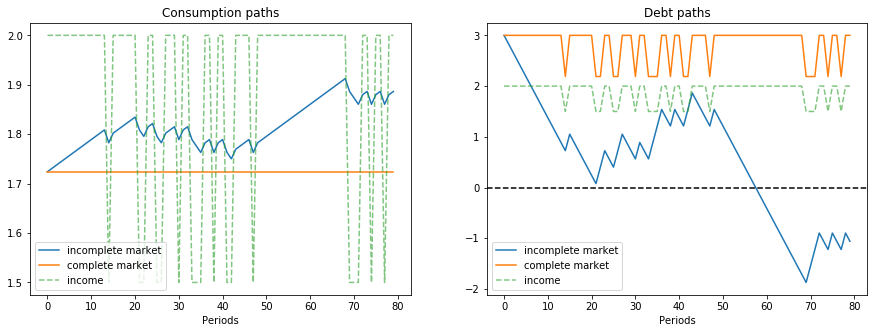

In [3]:
cp = ConsumptionProblem()
s_path = cp.simulate()
N_simul = len(s_path)

c_bar, debt_complete = consumption_complete(cp)

c_path, debt_path, y_path = consumption_incomplete(cp, s_path)

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].set_title('Consumption paths')
ax[0].plot(np.arange(N_simul), c_path, label='incomplete market')
ax[0].plot(np.arange(N_simul), c_bar * np.ones(N_simul), label='complete market')
ax[0].plot(np.arange(N_simul), y_path, label='income', alpha=.6, ls='--')
ax[0].legend()
ax[0].set_xlabel('Periods')

ax[1].set_title('Debt paths')
ax[1].plot(np.arange(N_simul), debt_path, label='incomplete market')
ax[1].plot(np.arange(N_simul), debt_complete[s_path], label='complete market')
ax[1].plot(np.arange(N_simul), y_path, label='income', alpha=.6, ls='--')
ax[1].legend()
ax[1].axhline(0, color='k', ls='--')
ax[1].set_xlabel('Periods')

plt.show()

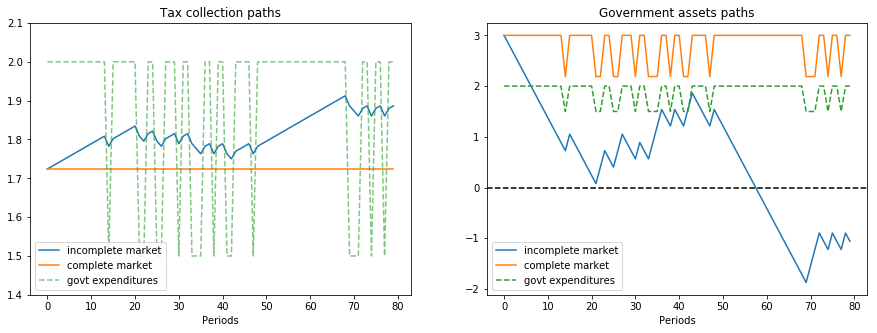

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].set_title('Tax collection paths')
ax[0].plot(np.arange(N_simul), c_path, label='incomplete market')
ax[0].plot(np.arange(N_simul), c_bar * np.ones(N_simul), label='complete market')
ax[0].plot(np.arange(N_simul), y_path, label='govt expenditures', alpha=.6, ls='--')
ax[0].legend()
ax[0].set_xlabel('Periods')
ax[0].set_ylim([1.4, 2.1])

ax[1].set_title('Government assets paths')
ax[1].plot(np.arange(N_simul), debt_path, label='incomplete market')
ax[1].plot(np.arange(N_simul), debt_complete[s_path], label='complete market')
ax[1].plot(np.arange(N_simul), y_path, label='govt expenditures', ls='--')
ax[1].legend()
ax[1].axhline(0, color='k', ls='--')
ax[1].set_xlabel('Periods')

plt.show()



In [5]:
def ex_post_gross_return(b, cp):
    """
    calculate the ex post one-period gross return on the portfolio
    of government assets, given b and Q.
    """
    Q = cp.β * cp.P

    values = Q @ b

    n = len(b)
    R = np.zeros((n, n))

    for i in range(n):
        ind = cp.P[i, :] != 0
        R[i, ind] = b[ind] / values[i]

    return R

def cumulative_return(s_path, R):
    """
    compute cumulative return from holding 1 unit market portfolio
    of government bonds, given some simulated state path.
    """
    T = len(s_path)

    RT_path = np.empty(T)
    RT_path[0] = 1
    RT_path[1:] = np.cumprod([R[s_path[t], s_path[t+1]] for t in range(T-1)])

    return RT_path

In [6]:
# Parameters
β = .96

# change notation y to g in the tax-smoothing example
g = [1, 2]
b0 = 1
P = np.array([[.8, .2],
              [.4, .6]])

cp = ConsumptionProblem(β, g, b0, P)
Q = β * P

# change notation c_bar to T_bar in the tax-smoothing example
T_bar, b = consumption_complete(cp)
R = ex_post_gross_return(b, cp)
s_path = [0, 1, 1, 1, 0]
RT_path = cumulative_return(s_path, R)

print(f"P \n {P}")
print(f"Q \n {Q}")
print(f"Govt expenditures in peace and war = {g}")
print(f"Constant tax collections = {T_bar}")
print(f"Govt debts in two states = {-b}")

msg = """
Now let's check the government's budget constraint in peace and war.
Our assumptions imply that the government always purchases 0 units of the
Arrow peace security.
"""
print(msg)

AS1 = Q[0, :] @ b
# spending on Arrow security
# since the spending on Arrow peace security is not 0 anymore after we change b0 to 1
print(f"Spending on Arrow security in peace = {AS1}")
AS2 = Q[1, :] @ b
print(f"Spending on Arrow security in war = {AS2}")

print("")
# tax collections minus debt levels
print("Government tax collections minus debt levels in peace and war")
TB1 = T_bar + b[0]
print(f"T+b in peace = {TB1}")
TB2 = T_bar + b[1]
print(f"T+b in war = {TB2}")

print("")
print("Total government spending in peace and war")
G1 = g[0] + AS1
G2 = g[1] + AS2
print(f"Peace = {G1}")
print(f"War = {G2}")

print("")
print("Let's see ex-post and ex-ante returns on Arrow securities")

Π = np.reciprocal(Q)
exret = Π
print(f"Ex-post returns to purchase of Arrow securities = \n {exret}")
exant = Π * P
print(f"Ex-ante returns to purchase of Arrow securities \n {exant}")

print("")
print("The Ex-post one-period gross return on the portfolio of government assets")
print(R)

print("")
print("The cumulative return earned from holding 1 unit market portfolio of government bonds")
print(RT_path[-1])

P 
 [[0.8 0.2]
 [0.4 0.6]]
Q 
 [[0.768 0.192]
 [0.384 0.576]]
Govt expenditures in peace and war = [1, 2]
Constant tax collections = 1.2716883116883118
Govt debts in two states = [-1.         -2.62337662]

Now let's check the government's budget constraint in peace and war.
Our assumptions imply that the government always purchases 0 units of the
Arrow peace security.

Spending on Arrow security in peace = 1.2716883116883118
Spending on Arrow security in war = 1.895064935064935

Government tax collections minus debt levels in peace and war
T+b in peace = 2.2716883116883118
T+b in war = 3.895064935064935

Total government spending in peace and war
Peace = 2.2716883116883118
War = 3.895064935064935

Let's see ex-post and ex-ante returns on Arrow securities
Ex-post returns to purchase of Arrow securities = 
 [[1.30208333 5.20833333]
 [2.60416667 1.73611111]]
Ex-ante returns to purchase of Arrow securities 
 [[1.04166667 1.04166667]
 [1.04166667 1.04166667]]

The Ex-post one-period gross r

In [7]:
class TaxSmoothingExample:
    """
    construct a tax-smoothing example, by relabeling consumption problem class.
    """
    def __init__(self, g, P, b0, states, β=.96,
                 init=0, s_path=None, N_simul=80, random_state=1):

        self.states = states # state names

        # if the path of states is not specified
        if s_path is None:
            self.cp = ConsumptionProblem(β, g, b0, P, init=init)
            self.s_path = self.cp.simulate(N_simul=N_simul, random_state=random_state)
        # if the path of states is specified
        else:
            self.cp = ConsumptionProblem(β, g, b0, P, init=s_path[0])
            self.s_path = s_path

        # solve for complete market case
        self.T_bar, self.b = consumption_complete(self.cp)
        self.debt_value = - (β * P @ self.b).T

        # solve for incomplete market case
        self.T_path, self.asset_path, self.g_path = \
            consumption_incomplete(self.cp, self.s_path)

        # calculate returns on state-contingent debt
        self.R = ex_post_gross_return(self.b, self.cp)
        self.RT_path = cumulative_return(self.s_path, self.R)

    def display(self):

        # plot graphs
        N = len(self.T_path)

        plt.figure()
        plt.title('Tax collection paths')
        plt.plot(np.arange(N), self.T_path, label='incomplete market')
        plt.plot(np.arange(N), self.T_bar * np.ones(N), label='complete market')
        plt.plot(np.arange(N), self.g_path, label='govt expenditures', alpha=.6, ls='--')
        plt.legend()
        plt.xlabel('Periods')
        plt.show()

        plt.title('Government debt paths')
        plt.plot(np.arange(N), -self.asset_path, label='incomplete market')
        plt.plot(np.arange(N), -self.b[self.s_path], label='complete market')
        plt.plot(np.arange(N), self.g_path, label='govt expenditures', ls='--')
        plt.plot(np.arange(N), self.debt_value[self.s_path], label="today's value of debts")
        plt.legend()
        plt.axhline(0, color='k', ls='--')
        plt.xlabel('Periods')
        plt.show()

        fig, ax = plt.subplots()
        ax.set_title('Cumulative return path (complete market)')
        line1 = ax.plot(np.arange(N), self.RT_path)[0]
        c1 = line1.get_color()
        ax.set_xlabel('Periods')
        ax.set_ylabel('Cumulative return', color=c1)

        ax_ = ax.twinx()
        ax_._get_lines.prop_cycler = ax._get_lines.prop_cycler
        line2 = ax_.plot(np.arange(N), self.g_path, ls='--')[0]
        c2 = line2.get_color()
        ax_.set_ylabel('Government expenditures', color=c2)

        plt.show()

        # plot detailed information
        Q = self.cp.β * self.cp.P

        print(f"P \n {self.cp.P}")
        print(f"Q \n {Q}")
        print(f"Govt expenditures in {', '.join(self.states)} = {self.cp.y.flatten()}")
        print(f"Constant tax collections = {self.T_bar}")
        print(f"Govt debt in {len(self.states)} states = {-self.b}")

        print("")
        print(f"Government tax collections minus debt levels in {', '.join(self.states)}")
        for i in range(len(self.states)):
            TB = self.T_bar + self.b[i]
            print(f"  T+b in {self.states[i]} = {TB}")

        print("")
        print(f"Total government spending in {', '.join(self.states)}")
        for i in range(len(self.states)):
            G = self.cp.y[i, 0] + Q[i, :] @ self.b
            print(f"  {self.states[i]} = {G}")

        print("")
        print("Let's see ex-post and ex-ante returns on Arrow securities \n")

        print(f"Ex-post returns to purchase of Arrow securities:")
        for i in range(len(self.states)):
            for j in range(len(self.states)):
                if Q[i, j] != 0.:
                    print(f"  π({self.states[j]}|{self.states[i]}) = {1/Q[i, j]}")

        print("")
        exant = 1 / self.cp.β
        print(f"Ex-ante returns to purchase of Arrow securities = {exant}")

        print("")
        print("The Ex-post one-period gross return on the portfolio of government assets")
        print(self.R)

        print("")
        print("The cumulative return earned from holding 1 unit market portfolio of government bonds")
        print(self.RT_path[-1])

In [8]:
γ = .1
λ = .1
ϕ = .1
θ = .1
ψ = .1
g_L = .5
g_M = .8
g_H = 1.2
β = .96

In [9]:
g_ex1 = [g_L, g_H, g_M]
P_ex1 = np.array([[1-λ, λ,  0],
                  [0, 1-ϕ,  ϕ],
                  [0,   0,  1]])
b0_ex1 = 1
states_ex1 = ['peace', 'war', 'postwar']

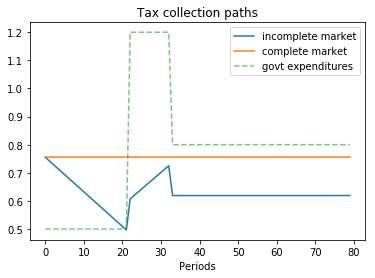

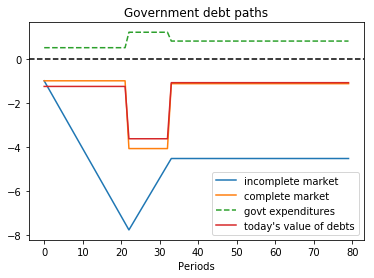

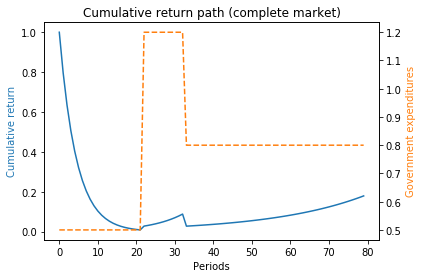

P 
 [[0.9 0.1 0. ]
 [0.  0.9 0.1]
 [0.  0.  1. ]]
Q 
 [[0.864 0.096 0.   ]
 [0.    0.864 0.096]
 [0.    0.    0.96 ]]
Govt expenditures in peace, war, postwar = [0.5 1.2 0.8]
Constant tax collections = 0.7548096885813149
Govt debt in 3 states = [-1.         -4.07093426 -1.12975779]

Government tax collections minus debt levels in peace, war, postwar
  T+b in peace = 1.754809688581315
  T+b in war = 4.825743944636679
  T+b in postwar = 1.8845674740484437

Total government spending in peace, war, postwar
  peace = 1.754809688581315
  war = 4.825743944636679
  postwar = 1.8845674740484437

Let's see ex-post and ex-ante returns on Arrow securities 

Ex-post returns to purchase of Arrow securities:
  π(peace|peace) = 1.1574074074074074
  π(war|peace) = 10.416666666666666
  π(war|war) = 1.1574074074074074
  π(postwar|war) = 10.416666666666666
  π(postwar|postwar) = 1.0416666666666667

Ex-ante returns to purchase of Arrow securities = 1.0416666666666667

The Ex-post one-period gross return on

In [10]:
ts_ex1 = TaxSmoothingExample(g_ex1, P_ex1, b0_ex1, states_ex1, random_state=1)
ts_ex1.display()

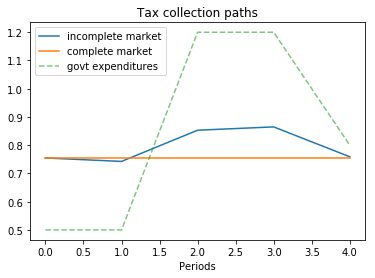

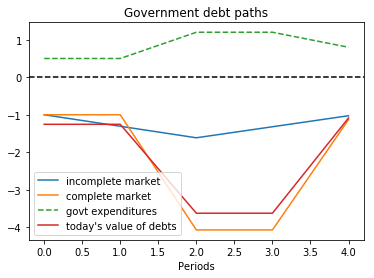

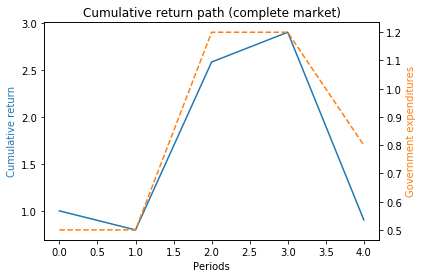

P 
 [[0.9 0.1 0. ]
 [0.  0.9 0.1]
 [0.  0.  1. ]]
Q 
 [[0.864 0.096 0.   ]
 [0.    0.864 0.096]
 [0.    0.    0.96 ]]
Govt expenditures in peace, war, postwar = [0.5 1.2 0.8]
Constant tax collections = 0.7548096885813149
Govt debt in 3 states = [-1.         -4.07093426 -1.12975779]

Government tax collections minus debt levels in peace, war, postwar
  T+b in peace = 1.754809688581315
  T+b in war = 4.825743944636679
  T+b in postwar = 1.8845674740484437

Total government spending in peace, war, postwar
  peace = 1.754809688581315
  war = 4.825743944636679
  postwar = 1.8845674740484437

Let's see ex-post and ex-ante returns on Arrow securities 

Ex-post returns to purchase of Arrow securities:
  π(peace|peace) = 1.1574074074074074
  π(war|peace) = 10.416666666666666
  π(war|war) = 1.1574074074074074
  π(postwar|war) = 10.416666666666666
  π(postwar|postwar) = 1.0416666666666667

Ex-ante returns to purchase of Arrow securities = 1.0416666666666667

The Ex-post one-period gross return on

In [11]:
# The following shows the use of the wrapper class when a specific state path is given
s_path = [0, 0, 1, 1, 2]
ts_s_path = TaxSmoothingExample(g_ex1, P_ex1, b0_ex1, states_ex1, s_path=s_path)
ts_s_path.display()

In [12]:
g_ex2 = [g_L, g_L, g_H]
P_ex2 = np.array([[1,   0,    0],
                  [0, 1-γ,    γ],
                  [ϕ,   0, 1-ϕ]])
b0_ex2 = 1
states_ex2 = ['peace', 'temporary peace', 'war']

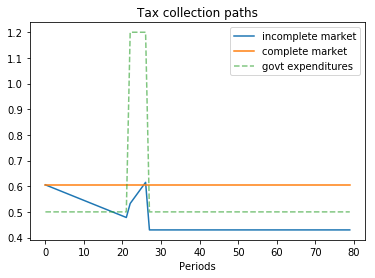

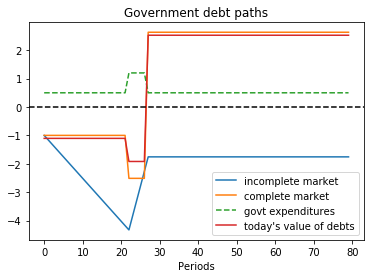

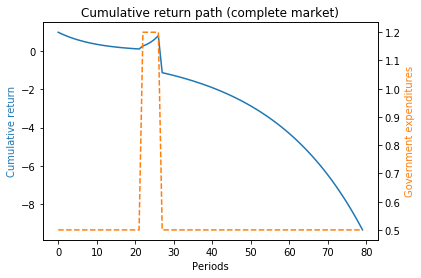

P 
 [[1.  0.  0. ]
 [0.  0.9 0.1]
 [0.1 0.  0.9]]
Q 
 [[0.96  0.    0.   ]
 [0.    0.864 0.096]
 [0.096 0.    0.864]]
Govt expenditures in peace, temporary peace, war = [0.5 0.5 1.2]
Constant tax collections = 0.6053287197231834
Govt debt in 3 states = [ 2.63321799 -1.         -2.51384083]

Government tax collections minus debt levels in peace, temporary peace, war
  T+b in peace = -2.027889273356399
  T+b in temporary peace = 1.6053287197231834
  T+b in war = 3.1191695501730106

Total government spending in peace, temporary peace, war
  peace = -2.027889273356399
  temporary peace = 1.6053287197231834
  war = 3.119169550173011

Let's see ex-post and ex-ante returns on Arrow securities 

Ex-post returns to purchase of Arrow securities:
  π(peace|peace) = 1.0416666666666667
  π(temporary peace|temporary peace) = 1.1574074074074074
  π(war|temporary peace) = 10.416666666666666
  π(peace|war) = 10.416666666666666
  π(war|war) = 1.1574074074074074

Ex-ante returns to purchase of Arrow secu

In [13]:
ts_ex2 = TaxSmoothingExample(g_ex2, P_ex2, b0_ex2, states_ex2, init=1, random_state=1)
ts_ex2.display()

In [14]:
g_ex3 = [g_L, g_L, g_H, g_H]
P_ex3 = np.array([[1-λ,  λ,   0,    0],
                  [0,  1-ϕ,   ϕ,     0],
                  [0,    0,  1-ψ,    ψ],
                  [θ,    0,    0,  1-θ ]])
b0_ex3 = 1
states_ex3 = ['peace1', 'peace2', 'war1', 'war2']

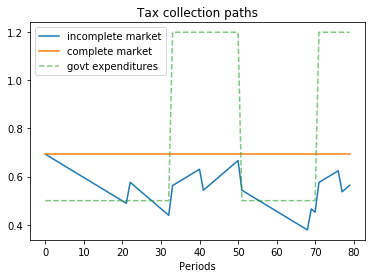

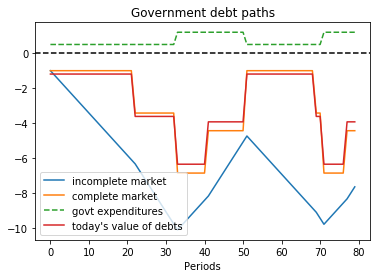

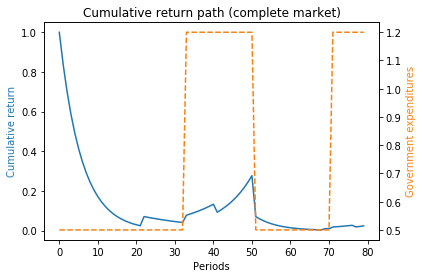

P 
 [[0.9 0.1 0.  0. ]
 [0.  0.9 0.1 0. ]
 [0.  0.  0.9 0.1]
 [0.1 0.  0.  0.9]]
Q 
 [[0.864 0.096 0.    0.   ]
 [0.    0.864 0.096 0.   ]
 [0.    0.    0.864 0.096]
 [0.096 0.    0.    0.864]]
Govt expenditures in peace1, peace2, war1, war2 = [0.5 0.5 1.2 1.2]
Constant tax collections = 0.6927944572748268
Govt debt in 4 states = [-1.         -3.42494226 -6.86027714 -4.43533487]

Government tax collections minus debt levels in peace1, peace2, war1, war2
  T+b in peace1 = 1.6927944572748268
  T+b in peace2 = 4.117736720554273
  T+b in war1 = 7.553071593533488
  T+b in war2 = 5.1281293302540405

Total government spending in peace1, peace2, war1, war2
  peace1 = 1.6927944572748268
  peace2 = 4.117736720554273
  war1 = 7.553071593533487
  war2 = 5.1281293302540405

Let's see ex-post and ex-ante returns on Arrow securities 

Ex-post returns to purchase of Arrow securities:
  π(peace1|peace1) = 1.1574074074074074
  π(peace2|peace1) = 10.416666666666666
  π(peace2|peace2) = 1.1574074074074074

In [15]:
ts_ex3 = TaxSmoothingExample(g_ex3, P_ex3, b0_ex3, states_ex3, random_state=1)
ts_ex3.display()

In [16]:
g_ex4 = [g_L, g_L, g_H, g_H, g_L]
P_ex4 = np.array([[1-λ,  λ,   0,     0,    0],
                  [0,  1-ϕ,   ϕ,     0,    0],
                  [0,    0,  1-ψ,    ψ,    0],
                  [0,    0,    0,   1-θ,   θ],
                  [0,    0,    0,     0,   1]])
b0_ex4 = 1
states_ex4 = ['peace1', 'peace2', 'war1', 'war2', 'permanent peace']

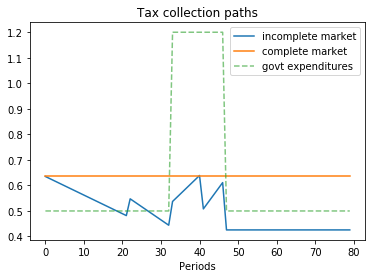

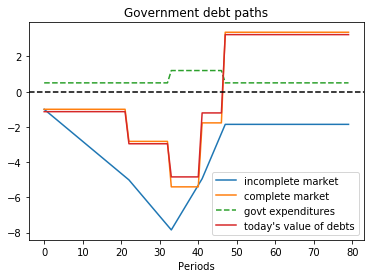

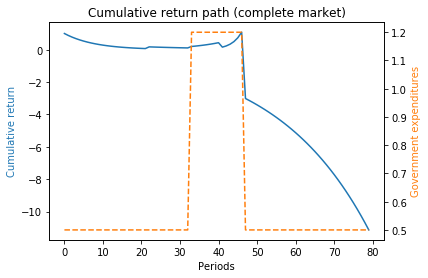

P 
 [[0.9 0.1 0.  0.  0. ]
 [0.  0.9 0.1 0.  0. ]
 [0.  0.  0.9 0.1 0. ]
 [0.  0.  0.  0.9 0.1]
 [0.  0.  0.  0.  1. ]]
Q 
 [[0.864 0.096 0.    0.    0.   ]
 [0.    0.864 0.096 0.    0.   ]
 [0.    0.    0.864 0.096 0.   ]
 [0.    0.    0.    0.864 0.096]
 [0.    0.    0.    0.    0.96 ]]
Govt expenditures in peace1, peace2, war1, war2, permanent peace = [0.5 0.5 1.2 1.2 0.5]
Constant tax collections = 0.6349979047185738
Govt debt in 5 states = [-1.         -2.82289484 -5.4053292  -1.77211121  3.37494762]

Government tax collections minus debt levels in peace1, peace2, war1, war2, permanent peace
  T+b in peace1 = 1.6349979047185736
  T+b in peace2 = 3.4578927455370505
  T+b in war1 = 6.040327103363229
  T+b in war2 = 2.407109110283644
  T+b in permanent peace = -2.739949713245767

Total government spending in peace1, peace2, war1, war2, permanent peace
  peace1 = 1.6349979047185736
  peace2 = 3.457892745537051
  war1 = 6.040327103363228
  war2 = 2.407109110283644
  permanent peace = -

In [17]:
ts_ex4 = TaxSmoothingExample(g_ex4, P_ex4, b0_ex4, states_ex4, random_state=1)
ts_ex4.display()

In [19]:
g_ex5 = [g_L, g_L, g_H, g_H, g_H, g_H, g_L]
P_ex5 = np.array([[0, 1, 0, 0, 0, 0, 0],
                  [0, 0, 1, 0, 0, 0, 0],
                  [0, 0, 0, 1, 0, 0, 0],
                  [0, 0, 0, 0, 1, 0, 0],
                  [0, 0, 0, 0, 0, 1, 0],
                  [0, 0, 0, 0, 0, 0, 1],
                  [0, 0, 0, 0, 0, 0, 1]])
b0_ex5 = 1
states_ex5 = ['peace1', 'peace2', 'war1', 'war2', 'war3', 'permanent peace']

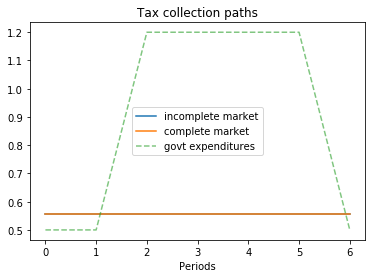

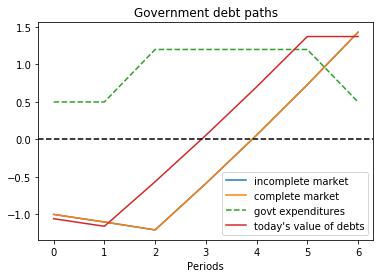

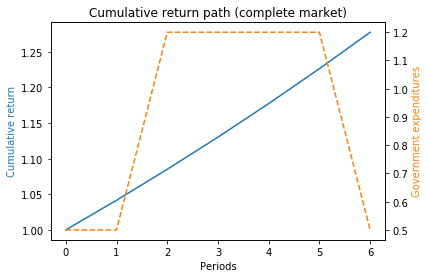

P 
 [[0 1 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 0 0 1 0]
 [0 0 0 0 0 0 1]
 [0 0 0 0 0 0 1]]
Q 
 [[0.   0.96 0.   0.   0.   0.   0.  ]
 [0.   0.   0.96 0.   0.   0.   0.  ]
 [0.   0.   0.   0.96 0.   0.   0.  ]
 [0.   0.   0.   0.   0.96 0.   0.  ]
 [0.   0.   0.   0.   0.   0.96 0.  ]
 [0.   0.   0.   0.   0.   0.   0.96]
 [0.   0.   0.   0.   0.   0.   0.96]]
Govt expenditures in peace1, peace2, war1, war2, war3, permanent peace = [0.5 0.5 1.2 1.2 1.2 1.2 0.5]
Constant tax collections = 0.5571895472128002
Govt debt in 6 states = [-1.         -1.10123911 -1.20669652 -0.58738132  0.05773868  0.72973868
  1.42973868]

Government tax collections minus debt levels in peace1, peace2, war1, war2, war3, permanent peace
  T+b in peace1 = 1.5571895472128001
  T+b in peace2 = 1.6584286588928006
  T+b in war1 = 1.7638860668928005
  T+b in war2 = 1.1445708668928007
  T+b in war3 = 0.499450866892801
  T+b in permanent peace = -0.1725491331071991

Total government spe

In [20]:
ts_ex5 = TaxSmoothingExample(g_ex5, P_ex5, b0_ex5, states_ex5, N_simul=7, random_state=1)
ts_ex5.display()

#### Lesson: Robustness

In [22]:
import pandas as pd
import numpy as np
from scipy.linalg import eig
import matplotlib.pyplot as plt
%matplotlib inline
import quantecon as qe

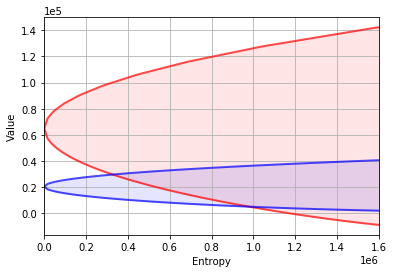

In [23]:
"""
Authors: Chase Coleman, Spencer Lyon, Thomas Sargent, John Stachurski
"""

# Model parameters

a_0 = 100
a_1 = 0.5
ρ = 0.9
σ_d = 0.05
β = 0.95
c = 2
γ = 50.0

θ = 0.002
ac = (a_0 - c) / 2.0

# Define LQ matrices

R = np.array([[0.,   ac,   0.],
            [ac, -a_1,  0.5],
            [0.,  0.5,  0.]])

R = -R  # For minimization
Q = γ / 2

A = np.array([[1., 0., 0.],
            [0., 1., 0.],
            [0., 0., ρ]])
B = np.array([[0.],
            [1.],
            [0.]])
C = np.array([[0.],
            [0.],
            [σ_d]])

# ----------------------------------------------------------------------- #
#                                 Functions
# ----------------------------------------------------------------------- #


def evaluate_policy(θ, F):

    """
    Given θ (scalar, dtype=float) and policy F (array_like), returns the
    value associated with that policy under the worst case path for {w_t},
    as well as the entropy level.
    """

    rlq = qe.robustlq.RBLQ(Q, R, A, B, C, β, θ)
    K_F, P_F, d_F, O_F, o_F = rlq.evaluate_F(F)
    x0 = np.array([[1.], [0.], [0.]])
    value = - x0.T @ P_F @ x0 - d_F
    entropy = x0.T @ O_F @ x0 + o_F
    return list(map(float, (value, entropy)))


def value_and_entropy(emax, F, bw, grid_size=1000):

    """
    Compute the value function and entropy levels for a θ path
    increasing until it reaches the specified target entropy value.

    Parameters
    ==========
    emax: scalar
        The target entropy value

    F: array_like
        The policy function to be evaluated

    bw: str
        A string specifying whether the implied shock path follows best
        or worst assumptions. The only acceptable values are 'best' and
        'worst'.

    Returns
    =======
    df: pd.DataFrame
        A pandas DataFrame containing the value function and entropy
        values up to the emax parameter. The columns are 'value' and
        'entropy'.
    """

    if bw == 'worst':
        θs = 1 / np.linspace(1e-8, 1000, grid_size)
    else:
        θs = -1 / np.linspace(1e-8, 1000, grid_size)

    df = pd.DataFrame(index=θs, columns=('value', 'entropy'))

    for θ in θs:
        df.loc[θ] = evaluate_policy(θ, F)
        if df.loc[θ, 'entropy'] >= emax:
            break

    df = df.dropna(how='any')
    return df


# ------------------------------------------------------------------------ #
#                                    Main
# ------------------------------------------------------------------------ #


# Compute the optimal rule
optimal_lq = qe.lqcontrol.LQ(Q, R, A, B, C, beta=β)
Po, Fo, do = optimal_lq.stationary_values()

# Compute a robust rule given θ
baseline_robust = qe.robustlq.RBLQ(Q, R, A, B, C, β, θ)
Fb, Kb, Pb = baseline_robust.robust_rule()

# Check the positive definiteness of worst-case covariance matrix to
# ensure that θ exceeds the breakdown point
test_matrix = np.identity(Pb.shape[0]) - (C.T @ Pb @ C) / θ
eigenvals, eigenvecs = eig(test_matrix)
assert (eigenvals >= 0).all(), 'θ below breakdown point.'


emax = 1.6e6

optimal_best_case = value_and_entropy(emax, Fo, 'best')
robust_best_case = value_and_entropy(emax, Fb, 'best')
optimal_worst_case = value_and_entropy(emax, Fo, 'worst')
robust_worst_case = value_and_entropy(emax, Fb, 'worst')

fig, ax = plt.subplots()

ax.set_xlim(0, emax)
ax.set_ylabel("Value")
ax.set_xlabel("Entropy")
ax.grid()

for axis in 'x', 'y':
    plt.ticklabel_format(style='sci', axis=axis, scilimits=(0, 0))

plot_args = {'lw': 2, 'alpha': 0.7}

colors = 'r', 'b'

df_pairs = ((optimal_best_case, optimal_worst_case),
            (robust_best_case, robust_worst_case))


class Curve:

    def __init__(self, x, y):
        self.x, self.y = x, y

    def __call__(self, z):
        return np.interp(z, self.x, self.y)


for c, df_pair in zip(colors, df_pairs):
    curves = []
    for df in df_pair:
        # Plot curves
        x, y = df['entropy'], df['value']
        x, y = (np.asarray(a, dtype='float') for a in (x, y))
        egrid = np.linspace(0, emax, 100)
        curve = Curve(x, y)
        print(ax.plot(egrid, curve(egrid), color=c, **plot_args))
        curves.append(curve)
    # Color fill between curves
    ax.fill_between(egrid,
                    curves[0](egrid),
                    curves[1](egrid),
                    color=c, alpha=0.1)

plt.show()

#### Lesson: Markov Jump Linear Quadratic Dynamic Programming

In [1]:
import numpy as np
import quantecon as qe
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

In [2]:
# Set discount factor
β = 0.95

In [3]:
def construct_arrays1(f1_vals=[1. ,1.],
                      f2_vals=[1., 1.],
                      d_vals=[1., 1.]):
    """
    Construct matrices that maps the problem described in example 1
    into a Markov jump linear quadratic dynamic programming problem
    """

    # Number of Markov states
    m = len(f1_vals)
    # Number of state and control variables
    n, k = 2, 1

    # Construct sets of matrices for each state
    As = [np.eye(n) for i in range(m)]
    Bs = [np.array([[1, 0]]).T for i in range(m)]

    Rs = np.zeros((m, n, n))
    Qs = np.zeros((m, k, k))

    for i in range(m):
        Rs[i, 0, 0] = f2_vals[i]
        Rs[i, 1, 0] = - f1_vals[i] / 2
        Rs[i, 0, 1] = - f1_vals[i] / 2

        Qs[i, 0, 0] = d_vals[i]

    Cs, Ns = None, None

    # Compute the optimal k level of the payoff function in each state
    k_star = np.empty(m)
    for i in range(m):
        k_star[i] = f1_vals[i] / (2 * f2_vals[i])

    return Qs, Rs, Ns, As, Bs, Cs, k_star

In [4]:
state_vec1 = ["k", "constant term"]

In [5]:
# Construct Markov transition matrix
Π1 = np.array([[0., 1.],
               [1., 0.]])

In [6]:
# Construct matrices
Qs, Rs, Ns, As, Bs, Cs, k_star = construct_arrays1(d_vals=[1., 0.5])

In [7]:
# Construct a Markov Jump LQ problem
ex1_a = qe.LQMarkov(Π1, Qs, Rs, As, Bs, Cs=Cs, Ns=Ns, beta=β)
# Solve for optimal value functions and decision rules
ex1_a.stationary_values();

In [8]:
# P(s)
ex1_a.Ps

array([[[ 1.56626026, -0.78313013],
        [-0.78313013, -4.60843493]],

       [[ 1.37424214, -0.68712107],
        [-0.68712107, -4.65643947]]])

In [9]:
# d(s) = 0, since there is no randomness
ex1_a.ds

array([0., 0.])

In [10]:
# F(s)
ex1_a.Fs

array([[[ 0.56626026, -0.28313013]],

       [[ 0.74848427, -0.37424214]]])

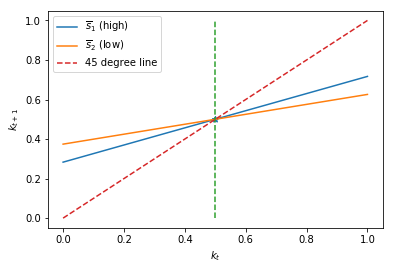

In [11]:
# Plot the optimal decision rules
k_grid = np.linspace(0., 1., 100)
# Optimal choice in state s1
u1_star = - ex1_a.Fs[0, 0, 1] - ex1_a.Fs[0, 0, 0] * k_grid
# Optimal choice in state s2
u2_star = - ex1_a.Fs[1, 0, 1] - ex1_a.Fs[1, 0, 0] * k_grid

fig, ax = plt.subplots()
ax.plot(k_grid, k_grid + u1_star, label="$\overline{s}_1$ (high)")
ax.plot(k_grid, k_grid + u2_star, label="$\overline{s}_2$ (low)")

# The optimal k*
ax.scatter([0.5, 0.5], [0.5, 0.5], marker="*")
ax.plot([k_star[0], k_star[0]], [0., 1.0], '--')

# 45 degree line
ax.plot([0., 1.], [0., 1.], '--', label="45 degree line")

ax.set_xlabel("$k_t$")
ax.set_ylabel("$k_{t+1}$")
ax.legend()
plt.show()

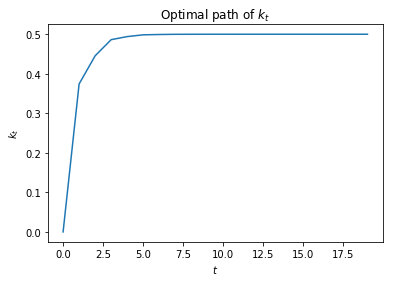

In [12]:
# Compute time series
T = 20
x0 = np.array([[0., 1.]]).T
x_path = ex1_a.compute_sequence(x0, ts_length=T)[0]

fig, ax = plt.subplots()
ax.plot(range(T), x_path[0, :-1])
ax.set_xlabel("$t$")
ax.set_ylabel("$k_t$")
ax.set_title("Optimal path of $k_t$")
plt.show()

In [13]:
λ = 0.8 # high λ
Π2 = np.array([[1-λ, λ],
               [λ, 1-λ]])

ex1_b = qe.LQMarkov(Π2, Qs, Rs, As, Bs, Cs=Cs, Ns=Ns, beta=β)
ex1_b.stationary_values();
ex1_b.Fs

array([[[ 0.57291724, -0.28645862]],

       [[ 0.74434525, -0.37217263]]])

In [14]:
λ = 0.2 # low λ
Π2 = np.array([[1-λ, λ],
               [λ, 1-λ]])

ex1_b = qe.LQMarkov(Π2, Qs, Rs, As, Bs, Cs=Cs, Ns=Ns, beta=β)
ex1_b.stationary_values();
ex1_b.Fs

array([[[ 0.59533259, -0.2976663 ]],

       [[ 0.72818728, -0.36409364]]])

In [15]:
λ_vals = np.linspace(0., 1., 10)
F1 = np.empty((λ_vals.size, 2))
F2 = np.empty((λ_vals.size, 2))

for i, λ in enumerate(λ_vals):
    Π2 = np.array([[1-λ, λ],
                   [λ, 1-λ]])

    ex1_b = qe.LQMarkov(Π2, Qs, Rs, As, Bs, Cs=Cs, Ns=Ns, beta=β)
    ex1_b.stationary_values();
    F1[i, :] = ex1_b.Fs[0, 0, :]
    F2[i, :] = ex1_b.Fs[1, 0, :]

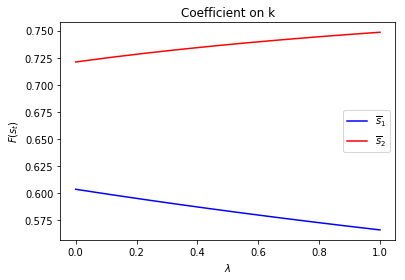

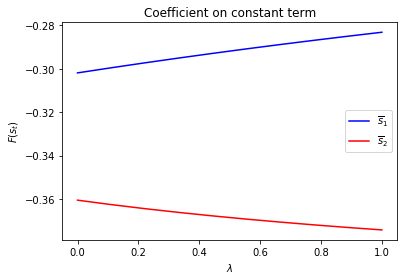

In [16]:
for i, state_var in enumerate(state_vec1):
    fig, ax = plt.subplots()
    ax.plot(λ_vals, F1[:, i], label="$\overline{s}_1$", color="b")
    ax.plot(λ_vals, F2[:, i], label="$\overline{s}_2$", color="r")

    ax.set_xlabel("$\lambda$")
    ax.set_ylabel("$F(s_t)$")
    ax.set_title(f"Coefficient on {state_var}")
    ax.legend()
    plt.show()

In [17]:
λ, δ = 0.8, 0.2
Π3 = np.array([[1-λ, λ],
               [δ, 1-δ]])

ex1_b = qe.LQMarkov(Π3, Qs, Rs, As, Bs, Cs=Cs, Ns=Ns, beta=β)
ex1_b.stationary_values();
ex1_b.Fs

array([[[ 0.57169781, -0.2858489 ]],

       [[ 0.72749075, -0.36374537]]])

In [18]:
λ_vals = np.linspace(0., 1., 10)
δ_vals = np.linspace(0., 1., 10)

λ_grid = np.empty((λ_vals.size, δ_vals.size))
δ_grid = np.empty((λ_vals.size, δ_vals.size))
F1_grid = np.empty((λ_vals.size, δ_vals.size, len(state_vec1)))
F2_grid = np.empty((λ_vals.size, δ_vals.size, len(state_vec1)))

for i, λ in enumerate(λ_vals):
    λ_grid[i, :] = λ
    δ_grid[i, :] = δ_vals
    for j, δ in enumerate(δ_vals):
        Π3 = np.array([[1-λ, λ],
                       [δ, 1-δ]])

        ex1_b = qe.LQMarkov(Π3, Qs, Rs, As, Bs, Cs=Cs, Ns=Ns, beta=β)
        ex1_b.stationary_values();
        F1_grid[i, j, :] = ex1_b.Fs[0, 0, :]
        F2_grid[i, j, :] = ex1_b.Fs[1, 0, :]

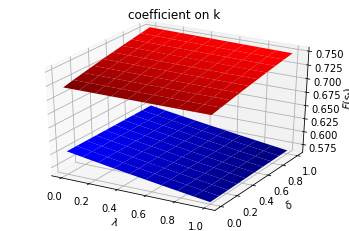

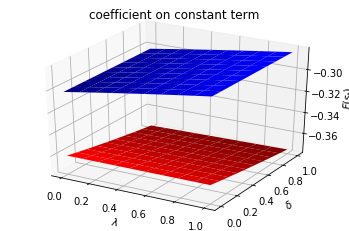

In [19]:
for i, state_var in enumerate(state_vec1):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    # high adjustment cost, blue surface
    ax.plot_surface(λ_grid, δ_grid, F1_grid[:, :, i], color="b")
    # low adjustment cost, red surface
    ax.plot_surface(λ_grid, δ_grid, F2_grid[:, :, i], color="r")
    ax.set_xlabel("$\lambda$")
    ax.set_ylabel("$\delta$")
    ax.set_zlabel("$F(s_t)$")
    ax.set_title(f"coefficient on {state_var}")
    plt.show()

In [20]:
def run(construct_func, vals_dict, state_vec):
    """
    A Wrapper function that repeats the computation above
    for different cases
    """

    Qs, Rs, Ns, As, Bs, Cs, k_star = construct_func(**vals_dict)

    # Symmetric Π
    # Notice that pure periodic transition is a special case
    # when λ=1
    print("symmetric Π case:\n")
    λ_vals = np.linspace(0., 1., 10)
    F1 = np.empty((λ_vals.size, len(state_vec)))
    F2 = np.empty((λ_vals.size, len(state_vec)))

    for i, λ in enumerate(λ_vals):
        Π2 = np.array([[1-λ, λ],
                       [λ, 1-λ]])

        mplq = qe.LQMarkov(Π2, Qs, Rs, As, Bs, Cs=Cs, Ns=Ns, beta=β)
        mplq.stationary_values();
        F1[i, :] = mplq.Fs[0, 0, :]
        F2[i, :] = mplq.Fs[1, 0, :]

    for i, state_var in enumerate(state_vec):
        fig = plt.figure()
        ax = fig.add_subplot(111)
        ax.plot(λ_vals, F1[:, i], label="$\overline{s}_1$", color="b")
        ax.plot(λ_vals, F2[:, i], label="$\overline{s}_2$", color="r")

        ax.set_xlabel("$\lambda$")
        ax.set_ylabel("$F(\overline{s}_t)$")
        ax.set_title(f"coefficient on {state_var}")
        ax.legend()
        plt.show()

    # Plot optimal k*(s_t) and k that optimal policies are targeting
    # only for example 1
    if state_vec == ["k", "constant term"]:
        fig = plt.figure()
        ax = fig.add_subplot(111)
        for i in range(2):
            F = [F1, F2][i]
            c = ["b", "r"][i]
            ax.plot([0, 1], [k_star[i], k_star[i]], "--",
                    color=c, label="$k^*(\overline{s}_"+str(i+1)+")$")
            ax.plot(λ_vals, - F[:, 1] / F[:, 0], color=c,
                    label="$k^{target}(\overline{s}_"+str(i+1)+")$")

        # Plot a vertical line at λ=0.5
        ax.plot([0.5, 0.5], [min(k_star), max(k_star)], "-.")

        ax.set_xlabel("$\lambda$")
        ax.set_ylabel("$k$")
        ax.set_title("Optimal k levels and k targets")
        ax.text(0.5, min(k_star)+(max(k_star)-min(k_star))/20, "$\lambda=0.5$")
        ax.legend(bbox_to_anchor=(1., 1.))
        plt.show()

    # Asymmetric Π
    print("asymmetric Π case:\n")
    δ_vals = np.linspace(0., 1., 10)

    λ_grid = np.empty((λ_vals.size, δ_vals.size))
    δ_grid = np.empty((λ_vals.size, δ_vals.size))
    F1_grid = np.empty((λ_vals.size, δ_vals.size, len(state_vec)))
    F2_grid = np.empty((λ_vals.size, δ_vals.size, len(state_vec)))

    for i, λ in enumerate(λ_vals):
        λ_grid[i, :] = λ
        δ_grid[i, :] = δ_vals
        for j, δ in enumerate(δ_vals):
            Π3 = np.array([[1-λ, λ],
                           [δ, 1-δ]])

            mplq = qe.LQMarkov(Π3, Qs, Rs, As, Bs, Cs=Cs, Ns=Ns, beta=β)
            mplq.stationary_values();
            F1_grid[i, j, :] = mplq.Fs[0, 0, :]
            F2_grid[i, j, :] = mplq.Fs[1, 0, :]

    for i, state_var in enumerate(state_vec):
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.plot_surface(λ_grid, δ_grid, F1_grid[:, :, i], color="b")
        ax.plot_surface(λ_grid, δ_grid, F2_grid[:, :, i], color="r")
        ax.set_xlabel("$\lambda$")
        ax.set_ylabel("$\delta$")
        ax.set_zlabel("$F(\overline{s}_t)$")
        ax.set_title(f"coefficient on {state_var}")
        plt.show()

symmetric Π case:



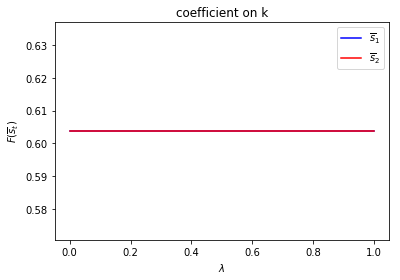

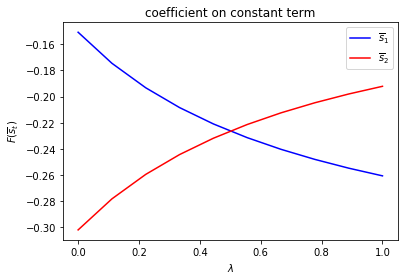

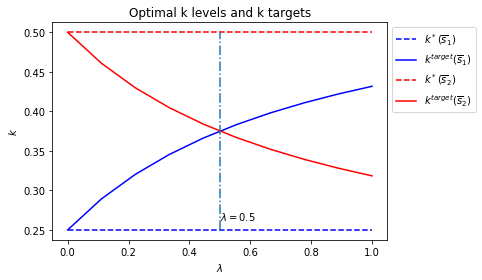

asymmetric Π case:



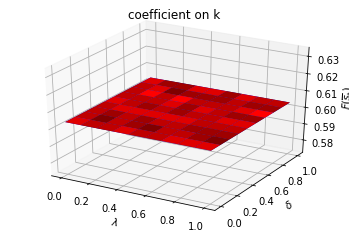

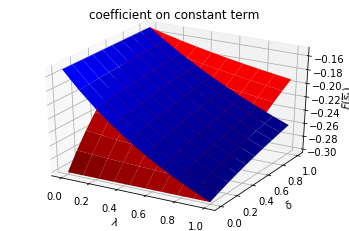

In [21]:
run(construct_arrays1, {"f1_vals":[0.5, 1.]}, state_vec1)

symmetric Π case:



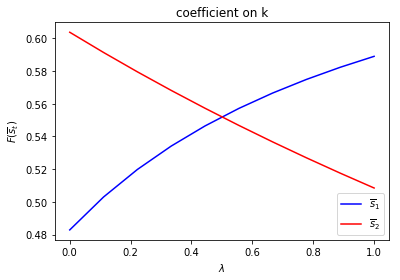

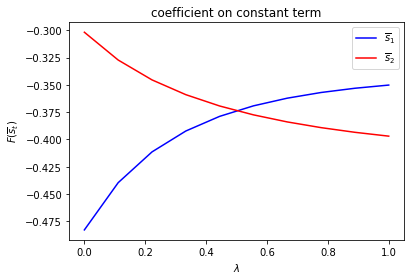

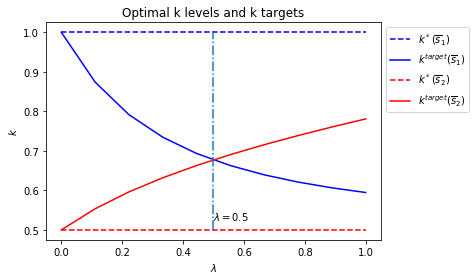

asymmetric Π case:



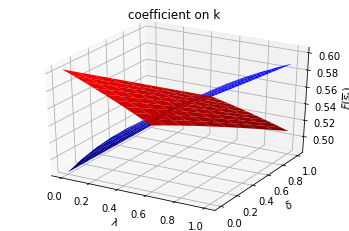

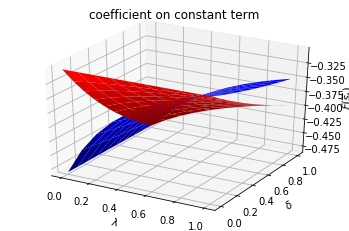

In [22]:
run(construct_arrays1, {"f2_vals":[0.5, 1.]}, state_vec1)